In [1]:
# Eng/Amr Mostafa Omar
# Nile University ,Cairo, Egypt
# Data 3/25/2024
# ID:204810331

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Part I:** Data Preparation

##**Step 1:** Load the Dataset


In [4]:
# Load the dataset
data_df = pd.read_csv('/content/gdrive/MyDrive/Project1/train.csv')

##**Step 2:** Describe the Data

In [5]:
# Basic data description
data_df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


##**Step 3:** Clean the Data

In [7]:
# Check for and remove duplicates
duplicates = data_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
data_df = data_df[~duplicates]

Number of duplicate rows: 0


In [8]:
# Check for missing values
print(data_df.isnull().sum())

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


##**Step 4:** Visualize the Data

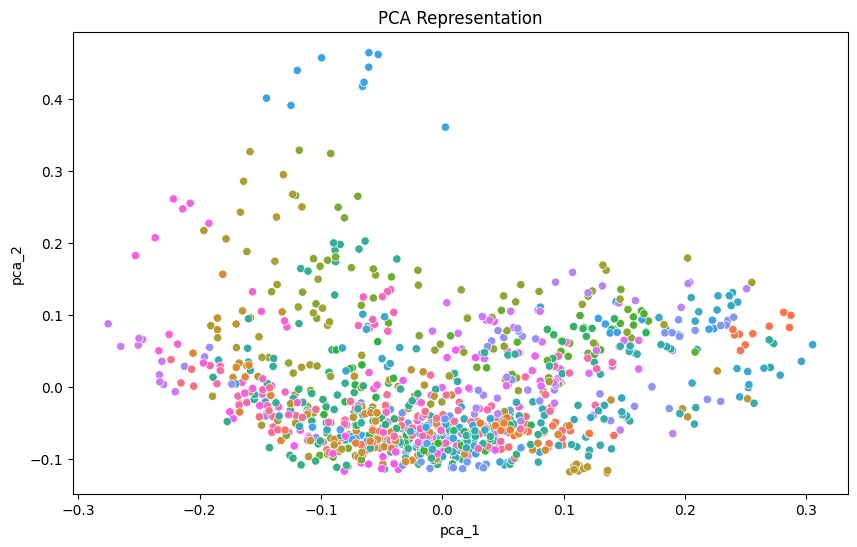

In [9]:
# PCA.
X = data_df.drop(['id', 'species'], axis=1)
y = data_df['species']


# define a PCA with only 2 components.
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# put the 2 componets with the classes in DataFrame to easily visualize it.
pca_df = pd.DataFrame(data=components, columns=['pca_1', 'pca_2'])
pca_df['species'] = y

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='species', data=pca_df , legend=False)
plt.title('PCA Representation');

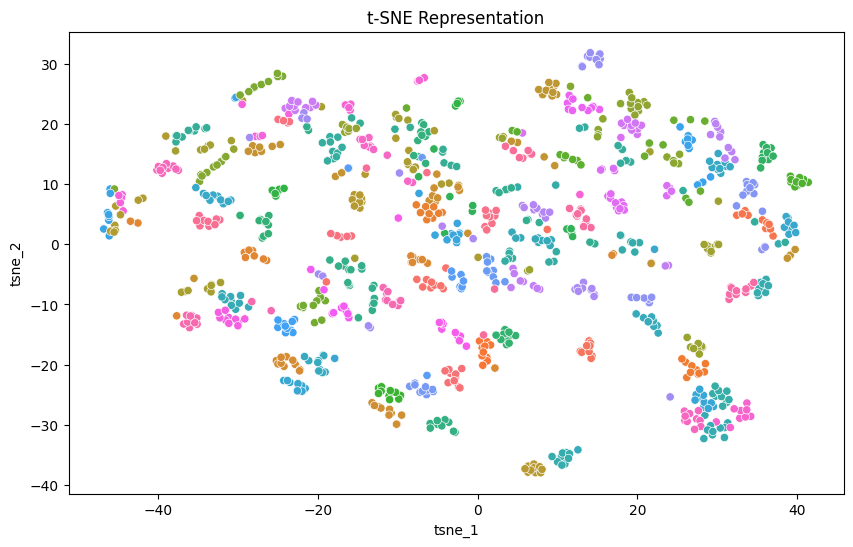

In [10]:
# t-SNE with 2 components
tsne = TSNE(n_components=2)
components_tsne = tsne.fit_transform(X)

# Put the 2 components with the classes in DataFrame
tsne_df = pd.DataFrame(data=components_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['species'] = y

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='species', data=tsne_df, legend=False)
plt.title('t-SNE Representation');

##**Step 5:** Draw Some of the Images

In [11]:
#   function to map IDs to image paths
def display_images(ids, images_directory):
    plt.figure(figsize=(10, 5))
    for i, img_id in enumerate(ids):
        img_path = f"{images_directory}/{img_id}.jpg"
        img = plt.imread(img_path)
        plt.subplot(5, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [12]:
sample_ids = data_df['id'].sample(n=20).values
sample_ids

array([1089,  340,  942, 1461,  408, 1529,  808, 1173,  865,  596,  415,
       1355,  100,   58, 1031, 1531,  106, 1003,  358, 1076])

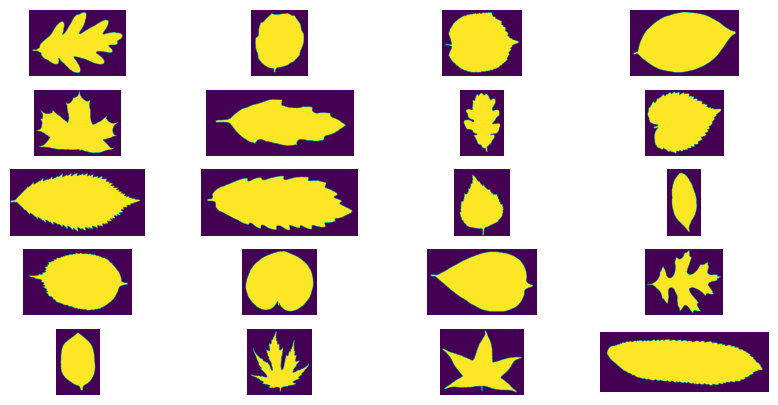

In [13]:

display_images(sample_ids, '/content/gdrive/MyDrive/Project1/images')

##**Step 6:** Correlation Analysis

<ipython-input-14-5ee6a7d4555f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_df.drop(['id'], axis=1).corr()


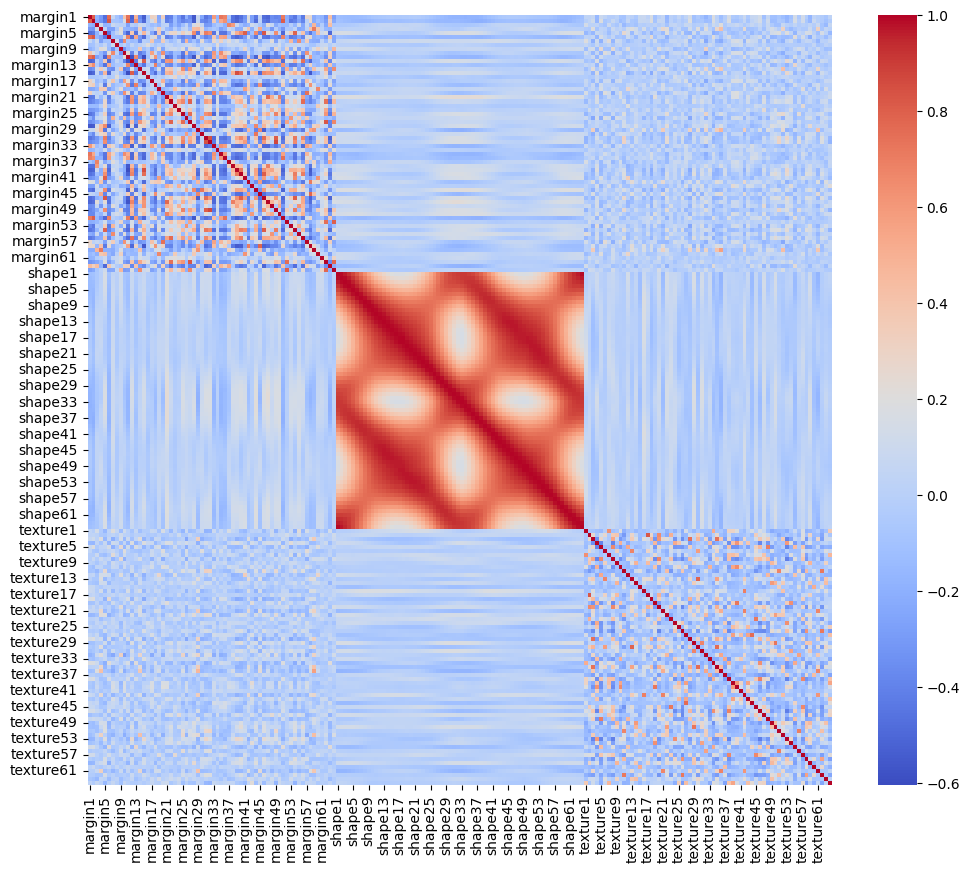

In [14]:
# Correlation matrix
corr_matrix = data_df.drop(['id'], axis=1).corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

##**Step 7:** Data Splitting and Preprocessing

In [15]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [16]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [17]:
# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

#**Part II:** Training a Neural Network

##**Step 1:** Define the Model and Training Function


In [18]:
from tensorflow.keras.layers import Dropout

def create_model(input_shape, num_classes, hidden_size=128, dropout_rate=0.5, learning_rate=0.001):
    # Create a Sequential model
    model = Sequential()

    # Add a dense layer with ReLU activation as the input layer
    model.add(Dense(hidden_size, input_shape=(input_shape,), activation='relu'))

    # Add dropout layer with the correct dropout rate
    model.add(Dropout(dropout_rate))

    # Add a dense layer with softmax activation as the output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with appropriate optimizer, loss function, and metrics
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [19]:
input_shape = X_train_scaled.shape[1]  # Number of features
num_classes = len(encoder.classes_)  # Number of classes

# Create the model
model = create_model(input_shape, num_classes)

##**Step 2:** Hyperparameter Exploration


In [20]:
batch_sizes = [16,32, 64]
hidden_sizes = [32,64,128]
dropout_rates = [0.2,0.3, 0.5]
learning_rates = [0.001, 0.01,0.1]
#optimizers = ['adam', 'sgd', 'rmsprop']  # List of optimizers to explore
epochs=50


In [21]:
results = []

for batch_size in batch_sizes:
    for hidden_size in hidden_sizes:
        for dropout_rate in dropout_rates:
            for learning_rate in learning_rates:
                # Create and compile the model with current hyperparameters
                model = create_model(input_shape, num_classes, hidden_size, dropout_rate, learning_rate)

                # Train the model
                history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_val_scaled, y_val_encoded),
                                    epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                train_loss, train_acc = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)
                val_loss, val_acc = model.evaluate(X_val_scaled, y_val_encoded, verbose=0)

                # Save results
                results.append({
                    'batch_size': batch_size,
                    'hidden_size': hidden_size,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate,
                    'train_loss': train_loss,
                    'train_acc': train_acc,
                    'val_loss': val_loss,
                    'val_acc': val_acc,
                    'history': history  # Save training history for analysis if needed
                })


##**Step 3:** Analysis and Reporting


In [22]:
# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

In [23]:
results_df

,batch_size,hidden_size,dropout_rate,learning_rate,train_loss,train_acc,val_loss,val_acc,history
0,16,32,0.2,0.001,0.007754,1.000000,0.103010,0.964646,<keras.src.callbacks.History object at 0x7ae99...
1,16,32,0.2,0.010,0.021281,0.994950,0.129788,0.969697,<keras.src.callbacks.History object at 0x7ae99...
2,16,32,0.2,0.100,4.277878,0.907828,17.233702,0.813131,<keras.src.callbacks.History object at 0x7ae99...
3,16,32,0.3,0.001,0.013149,1.000000,0.104436,0.974747,<keras.src.callbacks.History object at 0x7ae98...
4,16,32,0.3,0.010,0.006068,0.997475,0.247755,0.939394,<keras.src.callbacks.History object at 0x7ae98...
...,...,...,...,...,...,...,...,...,...
76,64,128,0.3,0.010,0.000093,1.000000,0.195833,0.979798,<keras.src.callbacks.History object at 0x7ae93...
77,64,128,0.3,0.100,0.009093,0.998737,23.447578,0.934343,<keras.src.callbacks.History object at 0x7ae93...
78,64,128,0.5,0.001,0.009353,1.000000,0.073115,0.979798,<keras.src.callbacks.History object at 0x7ae93...
79,64,128,0.5,0.010,0.000374,1.000000,0.184782,0.964646,<keras.src.callbacks.History object at 0x7ae93...


In [24]:
results_df.to_csv('results_df_final.csv', index=False)

In [25]:
# Result analysis
best_model = results_df.loc[results_df['val_acc'].idxmax()]
print("Best Model Hyperparameters:")
print(best_model)

Best Model Hyperparameters:
batch_size                                                      16
hidden_size                                                    128
dropout_rate                                                   0.5
learning_rate                                                0.001
train_loss                                                0.001044
train_acc                                                      1.0
val_loss                                                  0.023416
val_acc                                                        1.0
history          <keras.src.callbacks.History object at 0x7ae99...
Name: 24, dtype: object


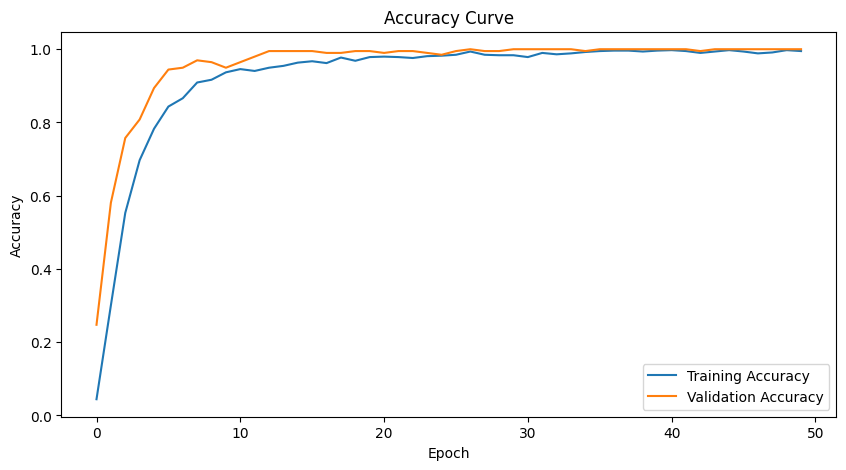

In [26]:
best_model_history = best_model.history.history

# Plot accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(best_model_history['accuracy'], label='Training Accuracy')
plt.plot(best_model_history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


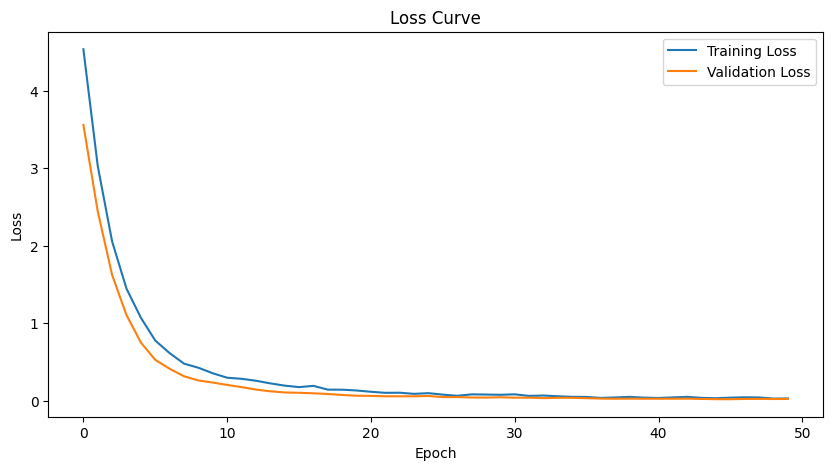

In [27]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(best_model_history['loss'], label='Training Loss')
plt.plot(best_model_history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
def plot_train_accuracy_vs_hyperparameter(results, hyperparameter, epochs=50):
    """
    Parameters:
    - results: List of dictionaries containing model results and configurations.
    - hyperparameter: String specifying the hyperparameter to compare.
    - epochs=50
    """
    # Initialize a dictionary to hold the training accuracies
    train_acc_per_hyperparameter = {}

    # Extract and organize training accuracies by hyperparameter value
    for result in results:
        param_value = result[hyperparameter]
        train_acc = result['history'].history['accuracy']

        if param_value not in train_acc_per_hyperparameter:
            train_acc_per_hyperparameter[param_value] = []

        train_acc_per_hyperparameter[param_value].append(train_acc)

    # Plotting
    plt.figure(figsize=(12, 8))
    for param_value, acc_histories in train_acc_per_hyperparameter.items():
        avg_train_acc = np.mean(acc_histories, axis=0)
        plt.plot(range(1, epochs + 1), avg_train_acc, label=f'{hyperparameter}: {param_value}')

    plt.title(f'Training Accuracy vs. {hyperparameter.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel('Training Accuracy')
    plt.legend()
    plt.show()

In [29]:
def plot_train_loss_vs_hyperparameter(results, hyperparameter, epochs=50):
    """
    Parameters:
    - results: List of dictionaries containing model results and configurations.
    - hyperparameter: String specifying the hyperparameter to compare.
    - epochs=50
    """
    # Initialize a dictionary to hold the training losses
    train_loss_per_hyperparameter = {}

    # Extract and organize training losses by hyperparameter value
    for result in results:
        param_value = result[hyperparameter]
        train_loss = result['history'].history['loss']

        if param_value not in train_loss_per_hyperparameter:
            train_loss_per_hyperparameter[param_value] = []

        train_loss_per_hyperparameter[param_value].append(train_loss)

    # Plotting
    plt.figure(figsize=(12, 8))
    for param_value, loss_histories in train_loss_per_hyperparameter.items():
        avg_train_loss = np.mean(loss_histories, axis=0)
        plt.plot(range(1, epochs + 1), avg_train_loss, label=f'{hyperparameter} {param_value}')

    plt.title(f'Training Loss vs. {hyperparameter.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.show()

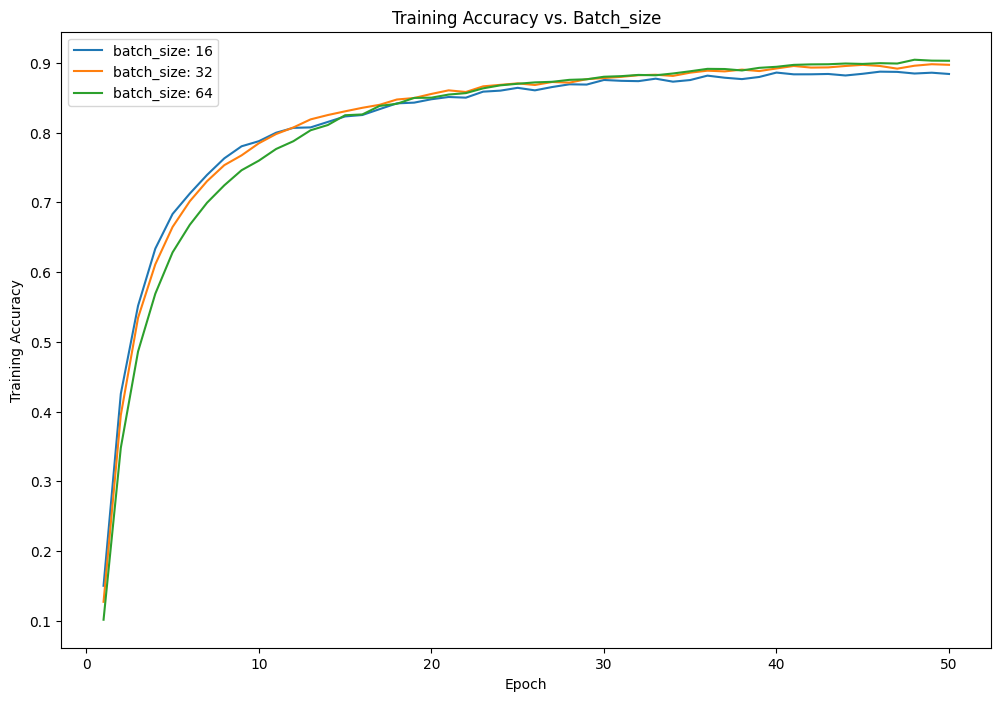

In [30]:
plot_train_accuracy_vs_hyperparameter(results, 'batch_size', 50)


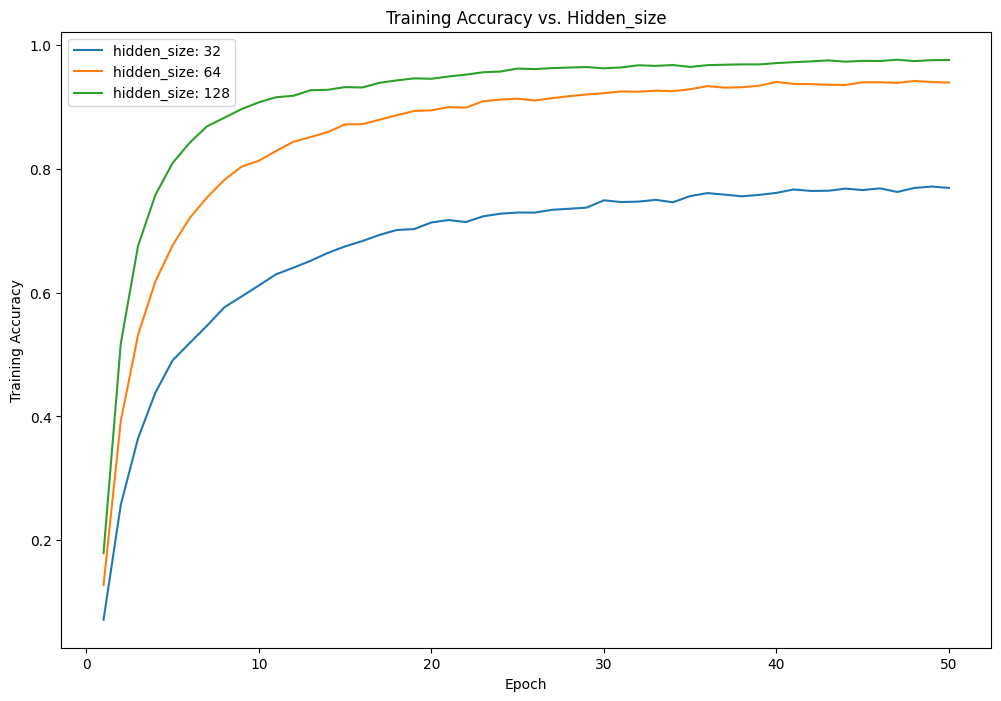

In [31]:
plot_train_accuracy_vs_hyperparameter(results, 'hidden_size', 50)


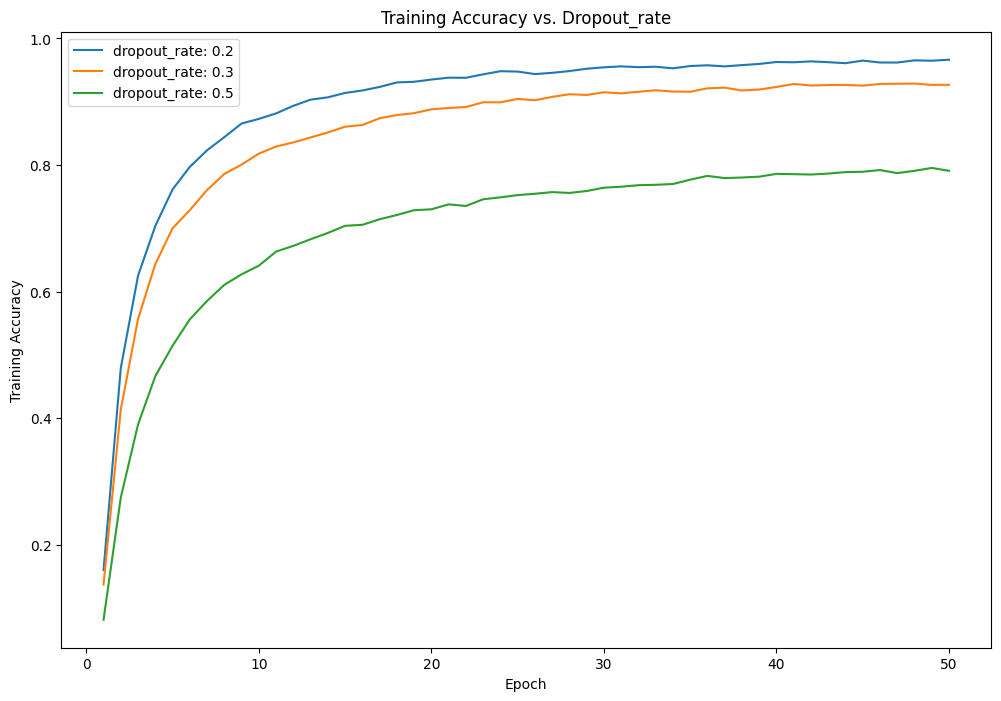

In [32]:
plot_train_accuracy_vs_hyperparameter(results, 'dropout_rate', 50)


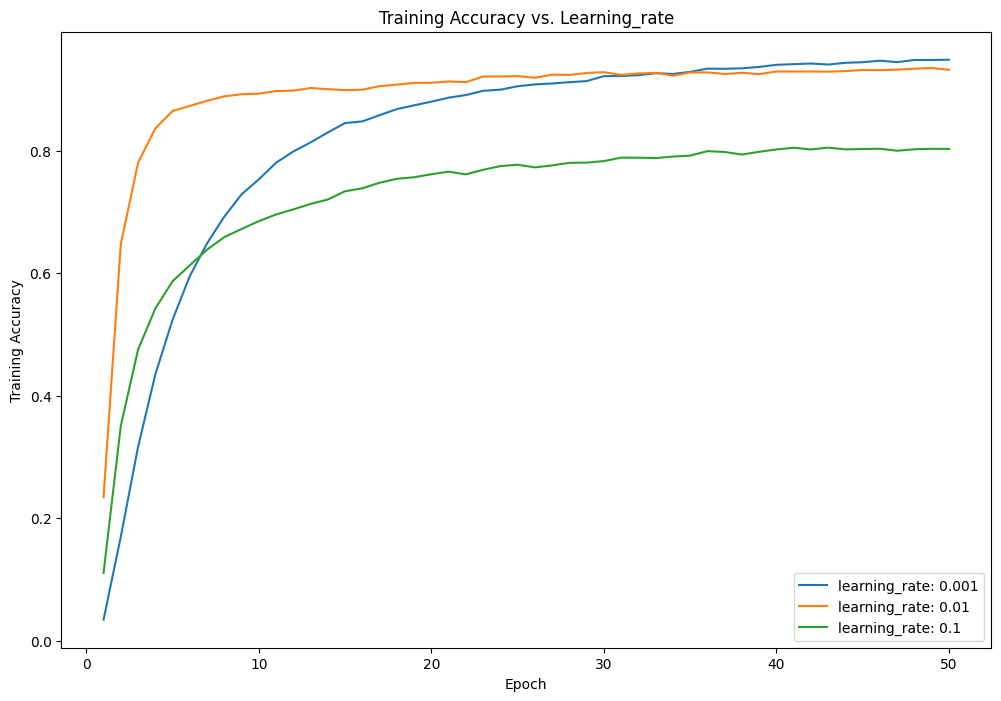

In [33]:
plot_train_accuracy_vs_hyperparameter(results, 'learning_rate', 50)


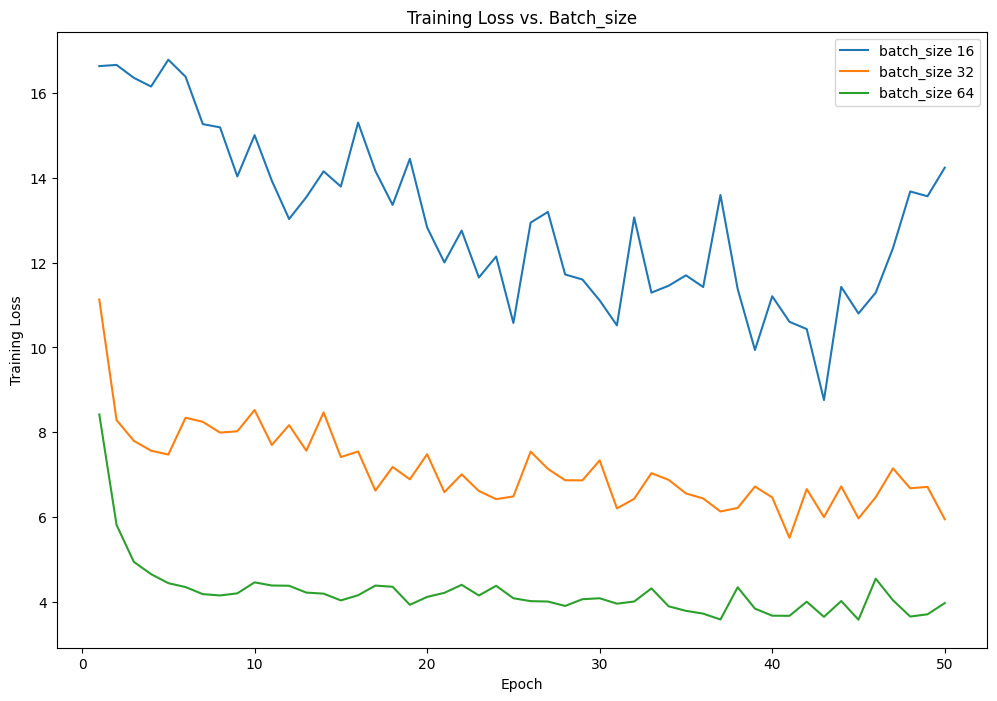

In [34]:
plot_train_loss_vs_hyperparameter(results, 'batch_size', 50)


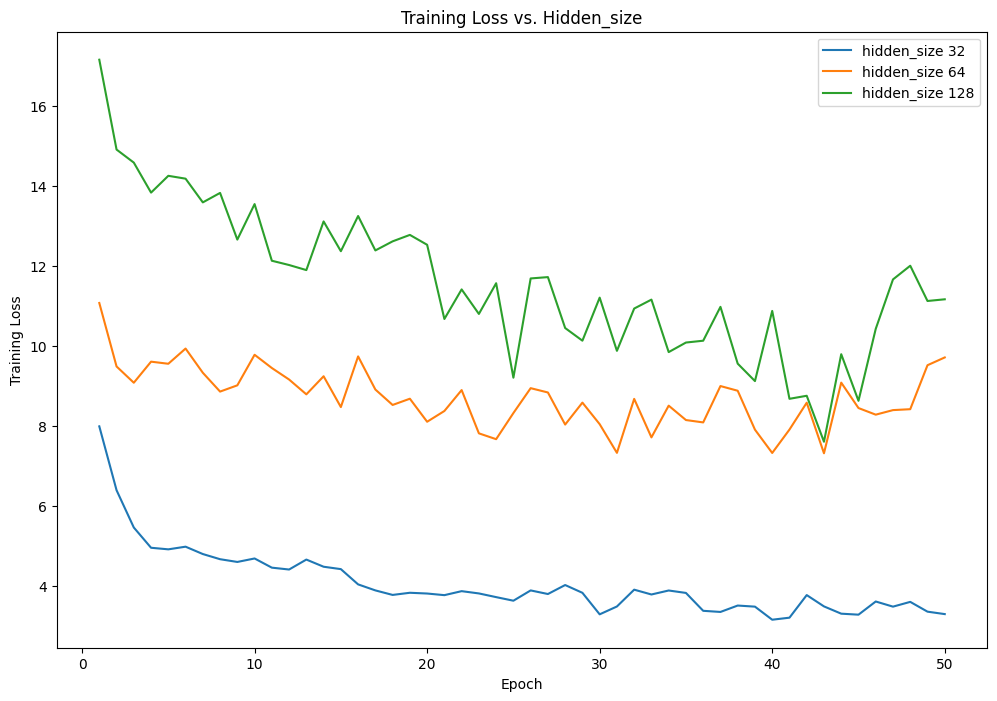

In [35]:
plot_train_loss_vs_hyperparameter(results, 'hidden_size', 50)

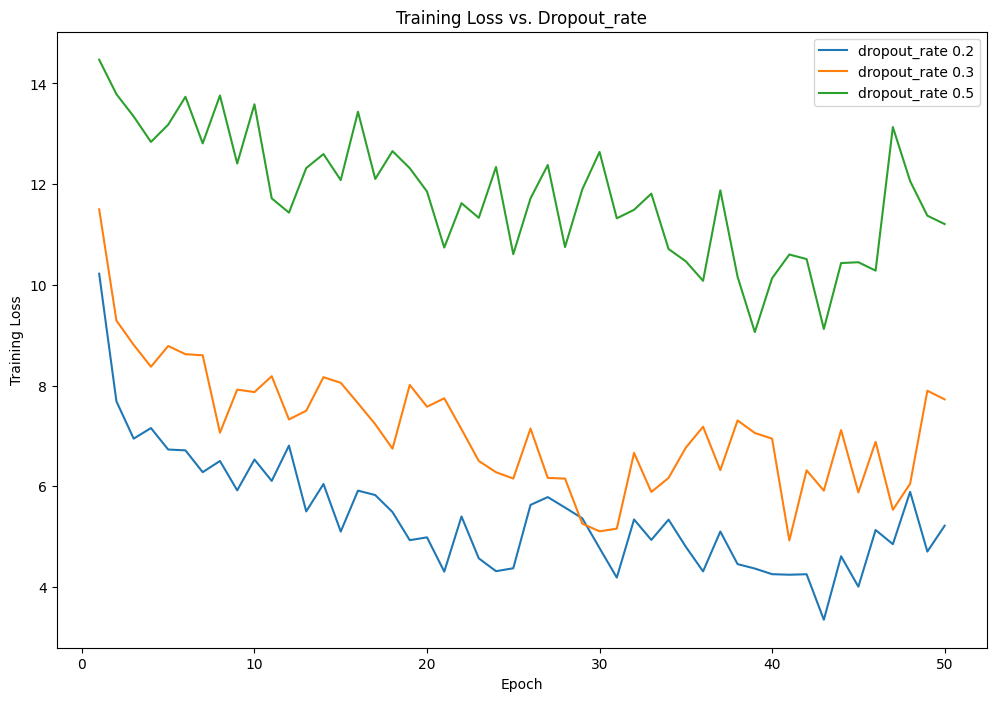

In [36]:
plot_train_loss_vs_hyperparameter(results, 'dropout_rate', 50)

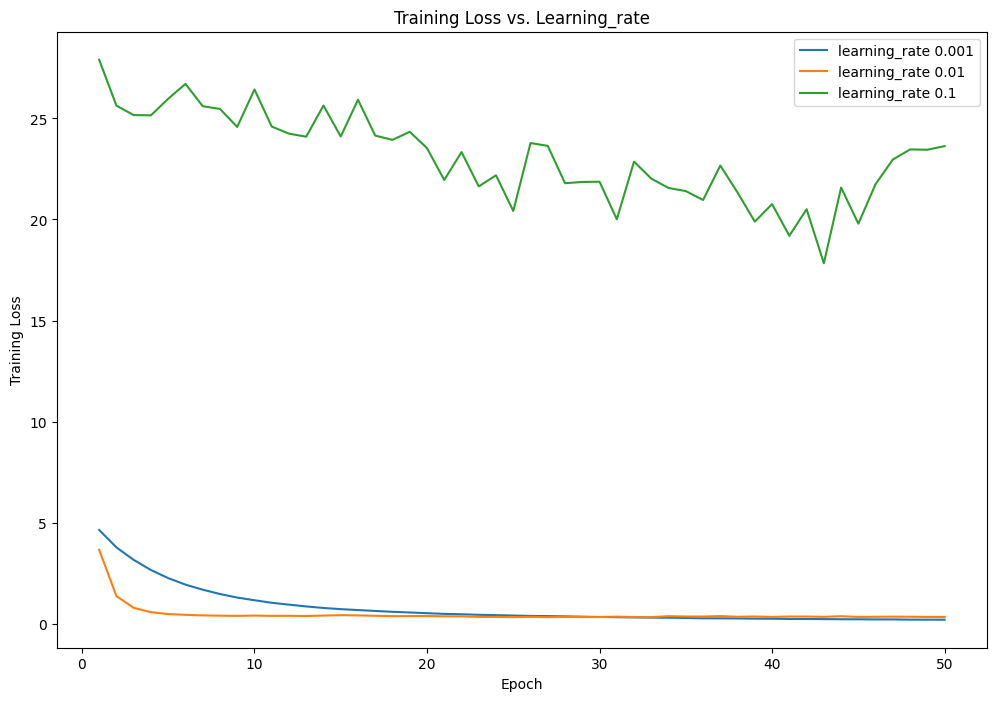

In [37]:
plot_train_loss_vs_hyperparameter(results, 'learning_rate', 50)